In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
gtex = pd.read_csv('gtex_xpr_trs_190422.csv', index_col = [0,1])

In [3]:
tis = pd.read_csv('gtex_sample_info_190422.csv')

In [4]:
tis = tis[tis['Sample'].str.contains('GTEX')]

In [5]:
tis2 = tis['body_site_detail (SMTSD)']

In [7]:
tis2 = tis2[~tis2.str.contains('Cells')]

In [8]:
l = list(tis2.unique())

In [9]:
l = sorted(l)

In [10]:
l

['Adipose - Subcutaneous',
 'Adipose - Visceral (Omentum)',
 'Adrenal Gland',
 'Artery - Aorta',
 'Artery - Coronary',
 'Artery - Tibial',
 'Bladder',
 'Brain - Amygdala',
 'Brain - Anterior cingulate cortex (BA24)',
 'Brain - Caudate (basal ganglia)',
 'Brain - Cerebellar Hemisphere',
 'Brain - Cerebellum',
 'Brain - Cortex',
 'Brain - Frontal Cortex (BA9)',
 'Brain - Hippocampus',
 'Brain - Hypothalamus',
 'Brain - Nucleus accumbens (basal ganglia)',
 'Brain - Putamen (basal ganglia)',
 'Brain - Spinal cord (cervical c-1)',
 'Brain - Substantia nigra',
 'Breast - Mammary Tissue',
 'Cervix - Ectocervix',
 'Cervix - Endocervix',
 'Colon - Sigmoid',
 'Colon - Transverse',
 'Esophagus - Gastroesophageal Junction',
 'Esophagus - Mucosa',
 'Esophagus - Muscularis',
 'Fallopian Tube',
 'Heart - Atrial Appendage',
 'Heart - Left Ventricle',
 'Kidney - Cortex',
 'Liver',
 'Lung',
 'Minor Salivary Gland',
 'Muscle - Skeletal',
 'Nerve - Tibial',
 'Ovary',
 'Pancreas',
 'Pituitary',
 'Prostate'

In [11]:
gtex = gtex.T.reset_index()

In [12]:
gtex['tissue'] = gtex['index'].map(tis.set_index('Sample')['body_site_detail (SMTSD)'])

In [15]:
gtex2 = gtex[~(gtex['tissue'].isnull() & gtex['tissue'].str.contains('Cells -'))]

In [19]:
gtex2 = gtex2.sort_values('tissue')

In [20]:
gtex3 = gtex2.groupby('tissue').mean()

C:\Users\Dynev\AppData\Local\Temp\ipykernel_1012\1255178971.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gtex3 = gtex2.groupby('tissue').mean()


In [21]:
gtex3

gene                                           CCDC187               \
uniprot_isoform                           A0A096LP49-1 A0A096LP49-2   
tissue                                                                
Adipose - Subcutaneous                        0.000221     0.006430   
Adipose - Visceral (Omentum)                  0.000073     0.006846   
Adrenal Gland                                 0.002083     0.009872   
Artery - Aorta                                0.000413     0.007451   
Artery - Coronary                             0.000361     0.007134   
Artery - Tibial                               0.001399     0.004208   
Bladder                                       0.146341     0.611778   
Brain - Amygdala                              0.009305     0.033602   
Brain - Anterior cingulate cortex (BA24)      0.009208     0.008087   
Brain - Caudate (basal ganglia)               0.006891     0.041876   
Brain - Cerebellar Hemisphere                 0.029042     0.193933   
Brain - Cerebellum                            0.028726     0.164754   
Brain - Cortex                                0.000546     0.017382   
Brain - Frontal Cortex (BA9)                  0.003982     0.007819   
Brain - Hippocampus                           0.000674     0.029824   
Brain - Hypothalamus                          0.044944     0.123509   
Brain - Nucleus accumbens (basal ganglia)     0.006305     0.030037   
Brain - Putamen (basal ganglia)               0.000000     0.004739   
Brain - Spinal cord (cervical c-1)            0.000950     0.008454   
Brain - Substantia nigra                      0.000748     0.007746   
Breast - Mammary Tissue                       0.004216     0.021608   
Cells - EBV-transformed lymphocytes           0.012205     0.075607   
Cells - Transformed fibroblasts               0.000056     0.006300   
Cervix - Ectocervix                           0.009431     0.019023   
Cervix - Endocervix                           0.362761     1.123695   
Colon - Sigmoid                               0.003672     0.019395   
Colon - Transverse                            0.006325     0.048173   
Esophagus - Gastroesophageal Junction         0.002777     0.009201   
Esophagus - Mucosa                            0.003789     0.016728   
Esophagus - Muscularis                        0.000523     0.006110   
Fallopian Tube                                0.887488     2.641821   
Heart - Atrial Appendage                      0.000164     0.004978   
Heart - Left Ventricle                        0.000213     0.002834   
Kidney - Cortex                               0.058527     0.148063   
Liver                                         0.036816     0.032492   
Lung                                          0.211423     0.713606   
Minor Salivary Gland                          0.001812     0.028634   
Muscle - Skeletal                             0.002386     0.004843   
Nerve - Tibial                                0.000651     0.009653   
Ovary                                         0.010471     0.043202   
Pancreas                                      0.061546     0.129780   
Pituitary                                     1.481620     2.156256   
Prostate                                      0.021926     0.053535   
Skin - Not Sun Exposed (Suprapubic)           0.003736     0.015456   
Skin - Sun Exposed (Lower leg)                0.001151     0.009096   
Small Intestine - Terminal Ileum              0.009542     0.031369   
Spleen                                        0.021633     0.051204   
Stomach                                       0.083629     0.218852   
Testis                                        3.040692     4.285265   
Thyroid                                       0.939377     2.173392   
Uterus                                        0.003149     0.015912   
Vagina                                        0.005691     0.012511   
Whole Blood                                   0.009286     0.018682   

gene                   

In [22]:
gtex3 = gtex3.T

In [23]:
gtex3

tissue                        Adipose - Subcutaneous  \
gene         uniprot_isoform                           
CCDC187      A0A096LP49-1                   0.000221   
             A0A096LP49-2                   0.006430   
LOC102724023 A0A0B4J2D5-1                   5.096716   
             A0A0B4J2D5-2                   0.102120   
LOC102724652 A0A140G945-1                   0.017064   
...                                              ...   
CAMTA1       Q9Y6Y1-1                       0.592322   
             Q9Y6Y1-3                       5.160602   
             Q9Y6Y1-4                       1.040811   
LY96         Q9Y6Y9-1                       3.940874   
             Q9Y6Y9-2                       1.799695   

tissue                        Adipose - Visceral (Omentum)  Adrenal Gland  \
gene         uniprot_isoform                                                
CCDC187      A0A096LP49-1                         0.000073       0.002083   
             A0A096LP49-2                         0.006846       0.009872   
LOC102724023 A0A0B4J2D5-1                         5.088353       5.388751   
             A0A0B4J2D5-2                         0.151979       0.570518   
LOC102724652 A0A140G945-1                         0.017076       0.002100   
...                                                    ...            ...   
CAMTA1       Q9Y6Y1-1                             0.699666       0.500152   
             Q9Y6Y1-3                             4.968529       5.049502   
             Q9Y6Y1-4                             0.742575       0.733948   
LY96         Q9Y6Y9-1                             4.115524       3.213892   
             Q9Y6Y9-2                             2.182490       1.082978   

tissue                        Artery - Aorta  Artery - Coronary  \
gene         uniprot_isoform                                      
CCDC187      A0A096LP49-1           0.000413           0.000361   
             A0A096LP49-2           0.007451           0.007134   
LOC102724023 A0A0B4J2D5-1           4.882795           4.920981   
             A0A0B4J2D5-2           0.058190           0.086149   
LOC102724652 A0A140G945-1           0.005087           0.006505   
...                                      ...                ...   
CAMTA1       Q9Y6Y1-1               0.667403           0.650658   
             Q9Y6Y1-3               6.360956           6.290037   
             Q9Y6Y1-4               1.755386           1.500403   
LY96         Q9Y6Y9-1               3.790024           3.929483   
             Q9Y6Y9-2               2.069104           2.006282   

tissue                        Artery - Tibial   Bladder  Brain - Amygdala  \
gene         uniprot_isoform                                                
CCDC187      A0A096LP49-1            0.001399  0.146341          0.009305   
             A0A096LP49-2            0.004208  0.611778          0.033602   
LOC102724023 A0A0B4J2D5-1            4.850007  4.466484          4.419140   
             A0A0B4J2D5-2            0.181894  0.149425          0.068648   
LOC102724652 A0A140G945-1            0.007844  0.000000          0.125781   
...                                       ...       ...               ...   
CAMTA1       Q9Y6Y1-1                0.661037  0.488918          2.303083   
             Q9Y6Y1-3                6.662998  5.861606          4.682953   
             Q9Y6Y1-4                1.964657  0.925671          1.043436   
LY96         Q9Y6Y9-1                2.983023  2.768135          1.532008   
             Q9Y6Y9-2                1.382563  1.262854          0.932842   

tissue                        Brain - Anterior cingulate cortex (BA24)  \
gene         uniprot_isoform                                             
CCDC187      A0A096LP49-1                                     0.009208   
             A0A096LP49-2                                     0.008087   
LOC102724023 A0A0B4J2D5-1                                     4.857861   
             A0A0B4J2D5-2

In [24]:
gtex3.columns.name = None

In [72]:
gtex4 = gtex3.loc['SNAP91', :]

In [73]:
gtex4.index.name=None

In [74]:
gtex4

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
O60641-1,0.012342,0.047684,0.351090,0.165208,0.156897,0.177508,0.015511,3.326852,4.675623,3.096786,...,0.015437,0.027975,0.314294,0.027715,0.206786,1.003493,0.109460,0.076159,0.116004,0.006821
O60641-3,0.006805,0.027485,0.014229,0.263698,0.212053,0.292373,0.118391,0.032656,0.123810,0.023718,...,0.006425,0.005472,0.062583,0.030153,0.049952,0.372053,0.048808,0.056252,0.022675,0.000468
O60641-4,0.046855,0.141927,0.243499,0.740868,0.576709,0.665480,0.328711,2.305031,2.259865,1.961689,...,0.045534,0.048320,0.264316,0.228026,0.225837,2.627677,0.252415,0.238137,0.125982,0.011508


In [75]:
gtex4 = gtex4.iloc[[0,4]]

IndexError: positional indexers are out-of-bounds

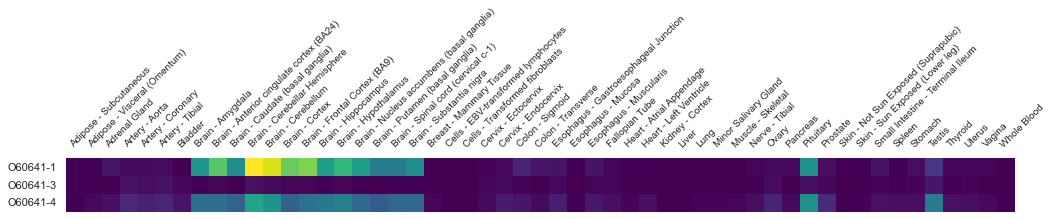

In [82]:
sns.set(rc={'figure.figsize': (17,1), 
            'xtick.labeltop': True,
            'xtick.labelbottom': False})

a = sns.heatmap(gtex4,
                vmin=0.0,
                xticklabels=True,
                cbar=False,
                cmap='viridis',
                square=True)

plt.setp(a.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor", fontsize=10);
#plt.savefig('exprtest6.png', dpi=300, bbox_inches='tight');

In [60]:
gtex3

,GTEX-WVJS-0226-SM-4MVOU,GTEX-13PLJ-0126-SM-5L3HU,GTEX-OXRK-0326-SM-2YUMQ,GTEX-XQ3S-1626-SM-4WAYN,GTEX-ZDTS-0226-SM-5HL7Q,GTEX-ZYWO-2526-SM-5GIDM,GTEX-RVPU-2326-SM-2TF6R,GTEX-POMQ-2326-SM-2S1O8,GTEX-139YR-2426-SM-5J1OB,GTEX-WY7C-2426-SM-3NB2V,...,GTEX-12WSL-0005-SM-5NQAD,GTEX-Y111-0006-SM-4SOIO,GTEX-QMR6-0005-SM-32PKY,GTEX-X638-0005-SM-47JX6,GTEX-13PLJ-0005-SM-5NQ99,GTEX-1314G-0005-SM-5NQ9O,GTEX-OIZH-0005-SM-2HMJN,GTEX-XMK1-0005-SM-4B665,GTEX-11LCK-0005-SM-5O98U,GTEX-12WSC-0005-SM-5MR3H
A0A096LP49-1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-6.5064,-9.9658,-9.9658,-6.5064
A0A096LP49-2,-6.5064,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-6.5064,-6.5064,...,-9.9658,-6.5064,-9.9658,-3.4580,-9.9658,-9.9658,-9.9658,-5.5735,-9.9658,-9.9658


In [27]:
gtex3.max().max()

15.288403658199503

In [145]:
proteoforms = ['O00165-1', 'O00165-5',
               'O00541-1', 'O00541-2',
               'O60641-1', 'O60641-3',
               'P00338-1', 'P00338-3',
               'P07948-1', 'P07948-2',
               'P14618-1', 'P14618-2',
               'P16989-1', 'P16989-2',
               'P17040-1', 'P17040-4',
               'P30040-1', 'P30040-2',
               'P35609-1', 'P35609-2',
               'P35613-1', 'P35613-3',
               'P36639-1', 'P36639-3',
               'P37802-1', 'P37802-2',
               'P50570-1', 'P50570-5',
               'Q13813-1', 'Q13813-3',
               'Q14697-1', 'Q14697-2',
               'Q15369-1', 'Q15369-2',
               'Q49A26-1', 'Q49A26-5',
               'Q92830-1', 'Q92830-2',
               'Q96AE7-1', 'Q96AE7-2',
               'Q96P63-1', 'Q96P63-2',
               'Q99832-1', 'Q99832-4',
               'Q9HOE9-1', 'Q9HOE9-2',
               'Q9NVA2-1', 'Q9NVA2-2',
               'Q9UBQ0-1', 'Q9UBQ0-2',
               'Q9Y277-1', 'Q9Y277-2',]

In [93]:
gtex5 = gtex3.droplevel(0)

In [94]:
gtex5.index.name = None

In [95]:
gtex5 = gtex5[gtex5.index.isin(proteoforms)]

In [96]:
gtex5

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
O00165-1,5.381622,5.451149,5.406670,5.832098,5.777569,5.947343,5.607069,4.521531,4.953380,5.009164,...,5.188363,5.272531,5.034544,5.164764,5.104912,6.007579,5.486086,5.624609,5.367491,3.508618
O00165-5,2.014754,1.981682,2.166486,2.131347,2.034640,2.141317,2.211386,0.906110,1.298289,1.211225,...,1.497558,1.622739,1.857703,2.205844,1.954317,2.593764,1.890832,1.756893,1.732942,0.918380
O00541-1,4.536503,4.301252,4.510947,4.439843,4.510688,4.495400,4.827440,3.120976,3.437287,3.355329,...,4.811816,4.932739,4.205501,4.467628,4.041384,5.060528,4.523015,4.869979,4.560343,2.049486
O00541-2,1.334807,1.123251,1.041717,0.985962,1.065410,1.032802,1.418452,0.440319,0.489671,0.541301,...,1.380641,1.544604,1.114690,1.171009,0.870308,1.176656,1.007419,1.315595,1.086401,0.374196
O60641-1,0.012342,0.047684,0.351090,0.165208,0.156897,0.177508,0.015511,3.326852,4.675623,3.096786,...,0.015437,0.027975,0.314294,0.027715,0.206786,1.003493,0.109460,0.076159,0.116004,0.006821
O60641-3,0.006805,0.027485,0.014229,0.263698,0.212053,0.292373,0.118391,0.032656,0.123810,0.023718,...,0.006425,0.005472,0.062583,0.030153,0.049952,0.372053,0.048808,0.056252,0.022675,0.000468
P00338-1,7.797886,7.698506,7.405848,8.094196,7.855234,8.196184,7.055876,5.401631,6.268002,5.889009,...,7.795541,7.909712,7.254635,6.721704,5.934973,6.517131,6.976920,6.551896,7.319738,6.171762
P00338-3,0.014945,0.023916,0.012658,0.017174,0.019794,0.022231,0.027885,0.027460,0.010937,0.008633,...,0.049413,0.044690,0.001777,0.003726,0.007219,0.032914,0.004362,0.002424,0.033550,0.013020
P07948-1,2.702630,2.714615,2.184822,2.289085,2.305641,1.975511,2.952692,0.852891,1.204168,0.920591,...,1.387236,1.525323,3.076461,4.404749,1.948425,1.091062,2.881018,1.558230,2.016903,5.286458
P07948-2,2.078748,2.170458,1.682891,1.764816,1.927243,1.348621,1.963032,1.007853,1.079958,0.792639,...,1.119701,1.171925,2.548980,4.873574,1.527402,0.950417,2.499275,1.212706,1.552198,4.478246


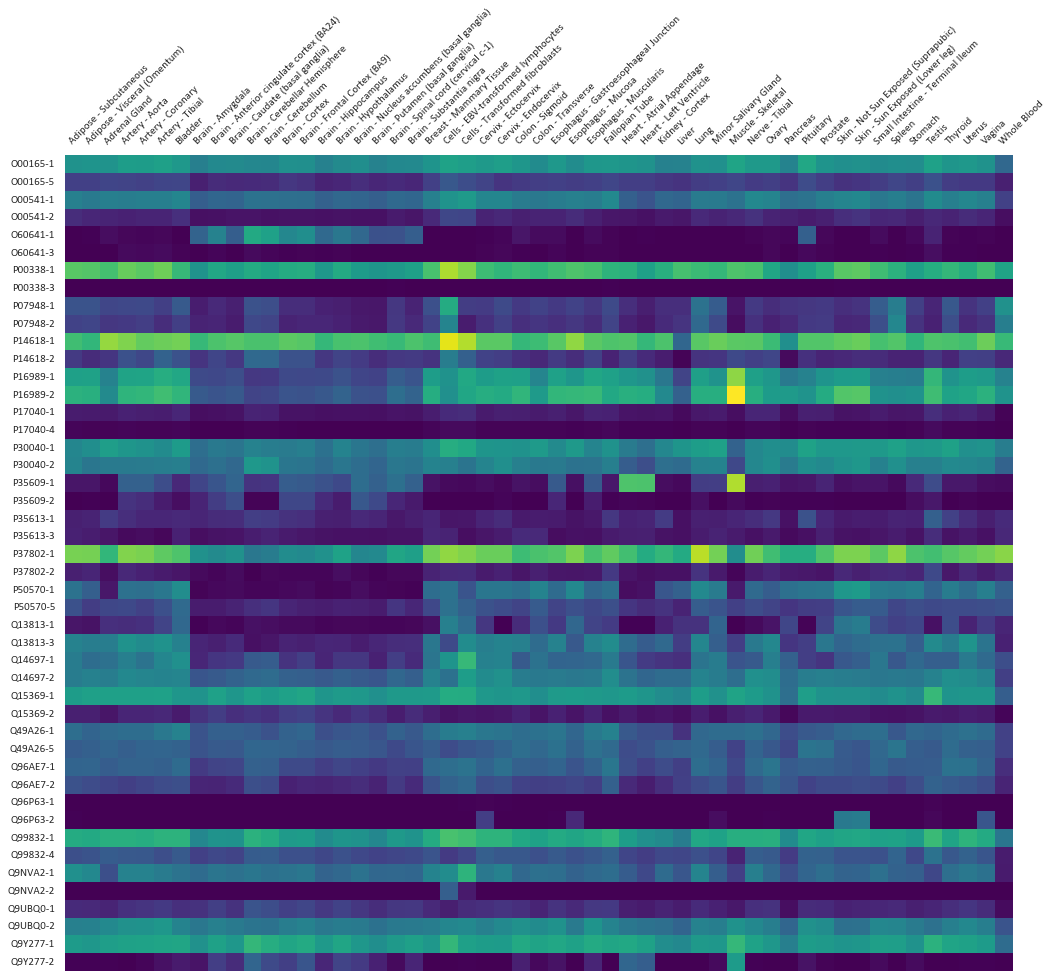

In [104]:
sns.set(rc={'figure.figsize': (17,15), 
            'xtick.labeltop': True,
            'xtick.labelbottom': False})

a = sns.heatmap(gtex5,
                vmin=0.0,
                xticklabels=True,
                cbar=False,
                cmap='viridis')

plt.setp(a.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor", fontsize=11, font='Calibri');
plt.setp(a.get_yticklabels(), fontsize=11, font='Calibri');
plt.savefig('exprtest7.png', dpi=300, bbox_inches='tight');

In [151]:
hpa = pd.read_csv('hpa.csv', index_col=[0,1])
import numpy as np
hpa2 = np.log2(hpa + 1)

In [152]:
hpa2 = hpa2.droplevel(0)

In [153]:
hpa2 = hpa2[list(hpa2.columns[:9]) + list(hpa2.columns[11:])]

In [154]:
hpa2.index.name = None

In [155]:
hpa2 = hpa2[hpa2.index.isin(proteoforms)]

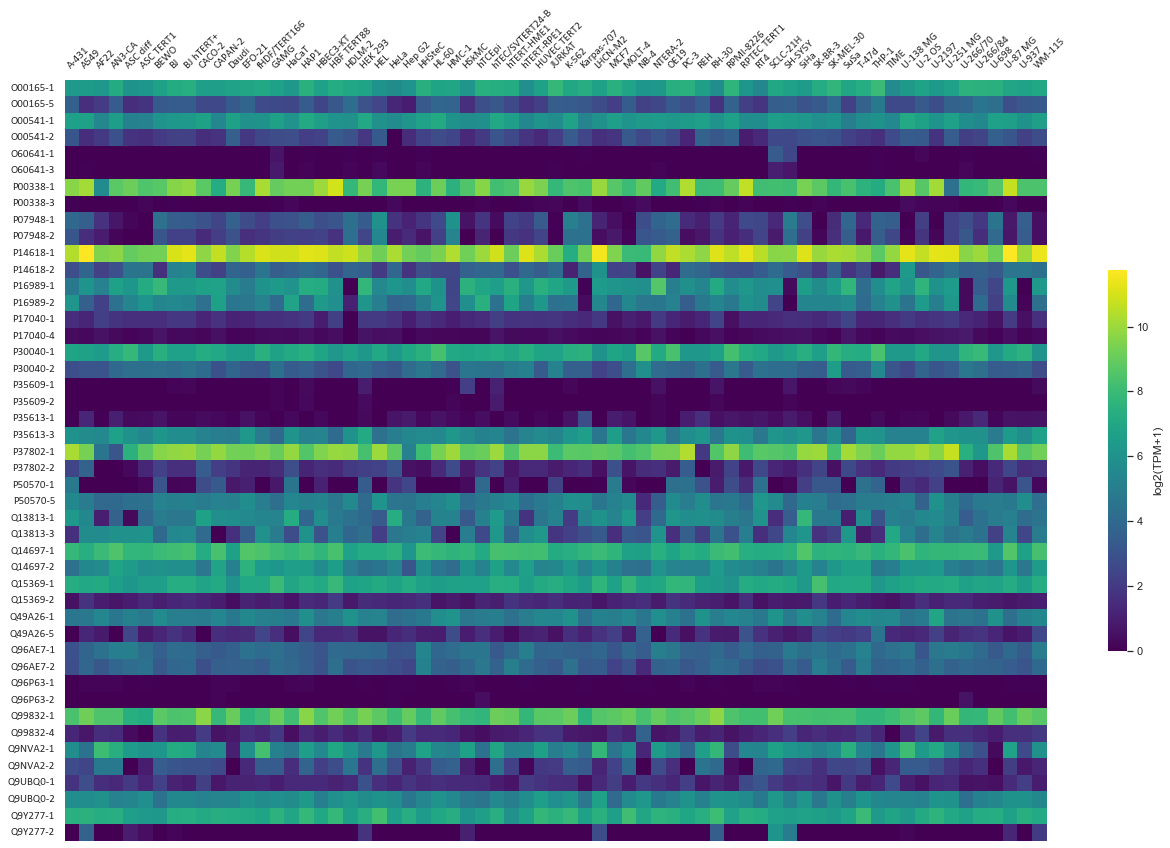

In [156]:
sns.set(rc={'figure.figsize': (22,14), 
            'xtick.labeltop': True,
            'xtick.labelbottom': False})

a = sns.heatmap(hpa2,
                vmin=0.0,
                xticklabels=True,
                cbar=True,
                cmap='viridis',
                cbar_kws={"shrink": .5,
                          'label': 'log2(TPM+1)'})

plt.setp(a.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor", fontsize=11, font='Calibri');
plt.setp(a.get_yticklabels(), fontsize=11, font='Calibri');
plt.savefig('exprtest7.png', dpi=300, bbox_inches='tight');

In [143]:
hpa2 = hpa2[list(hpa2.columns[:9]) + list(hpa2.columns[11:])]